5 comunidades más grandes: [(0, 831), (1, 369), (2, 232), (3, 217), (4, 146)]
Tópico 1 en Comunidad 0:
['chile', 'santiago', 'est', 'chiledesperto', 'toque', 'queda', '³n', 'pi', 'ħera', 'https']
Tópico 2 en Comunidad 0:
['gente', 'gobierno', 'chiledesperto', 'https', 'su', 'est', 'esto', 'sebastianpinera', 'ħs', '³n']
Tópico 3 en Comunidad 0:
['chile', 'estadoemergencia', 'https', 'todos', 'chiledesperto', 'est', 'ħn', 'su', '³n', 'sebastianpinera']
Tópico 4 en Comunidad 0:
['24horastvn', 'chiledesperto', 'chvnoticias', 'ħs', 'gente', 'pol', 'est', 'sebastianpinera', 'https', '³n']
Tópico 5 en Comunidad 0:
['estadoemergencia', '³n', 'gobierno', 'evadiresluchar', 'metro', 'chiledesperto', 'estadodeexcepcion', 'evasionmasiva', 'evasionmasivatodoeldia', 'https']
Tweets representativos de la Comunidad 0:
- Ganando La Serena, lo m�Ħs obvio es que Cobreloa le gane a los muertos de Valdivia y Puerto Montt haga lo mismo con los huasos de Santa Cruz.
ĊĵCuantos goles nos hace Magallanes?
- Como

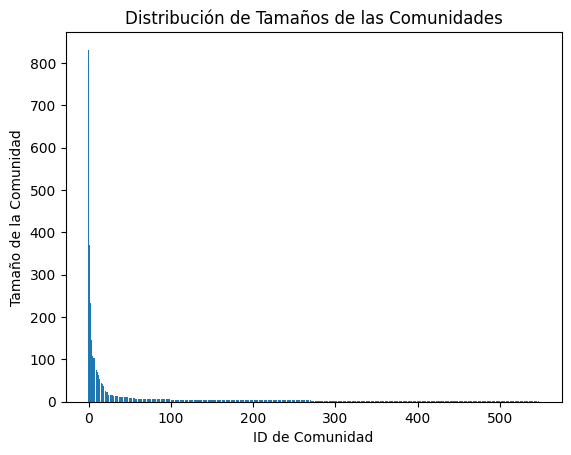

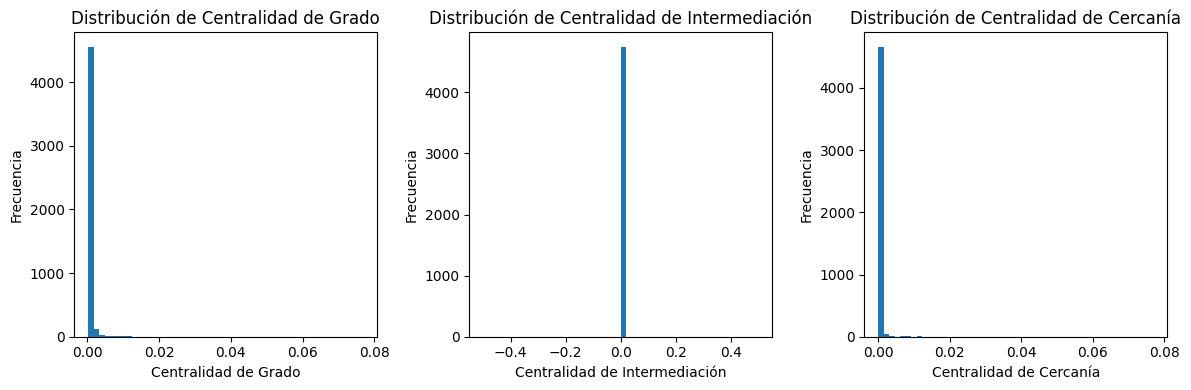

Top 5 nodos por centralidad de grado: [('sebastianpinera', 0.07695551338815096), ('T13', 0.02024035420619861), ('24HorasTVN', 0.01918616909129243), ('Carabdechile', 0.017921146953405017), ('user3846', 0.01644528779253637)]
Top 5 nodos por centralidad de intermediación: [('user11375', 0.0), ('MunicipioValpo', 0.0), ('MascotaGob', 0.0), ('JorgeSharp', 0.0), ('quilpueciudad', 0.0)]
Top 5 nodos por centralidad de cercanía: [('sebastianpinera', 0.07695551338815096), ('T13', 0.02024035420619861), ('24HorasTVN', 0.01918616909129243), ('Carabdechile', 0.017921146953405017), ('GobiernodeChile', 0.016234450769555132)]
Comunidad 0 - Tamaño: 831
   Centralidad de Grado Promedio: 0.0009
   Centralidad de Intermediación Promedio: 0.0000
   Centralidad de Cercanía Promedio: 0.0005
Comunidad 1 - Tamaño: 369
   Centralidad de Grado Promedio: 0.0007
   Centralidad de Intermediación Promedio: 0.0000
   Centralidad de Cercanía Promedio: 0.0004
Comunidad 2 - Tamaño: 232
   Centralidad de Grado Promedio: 0.

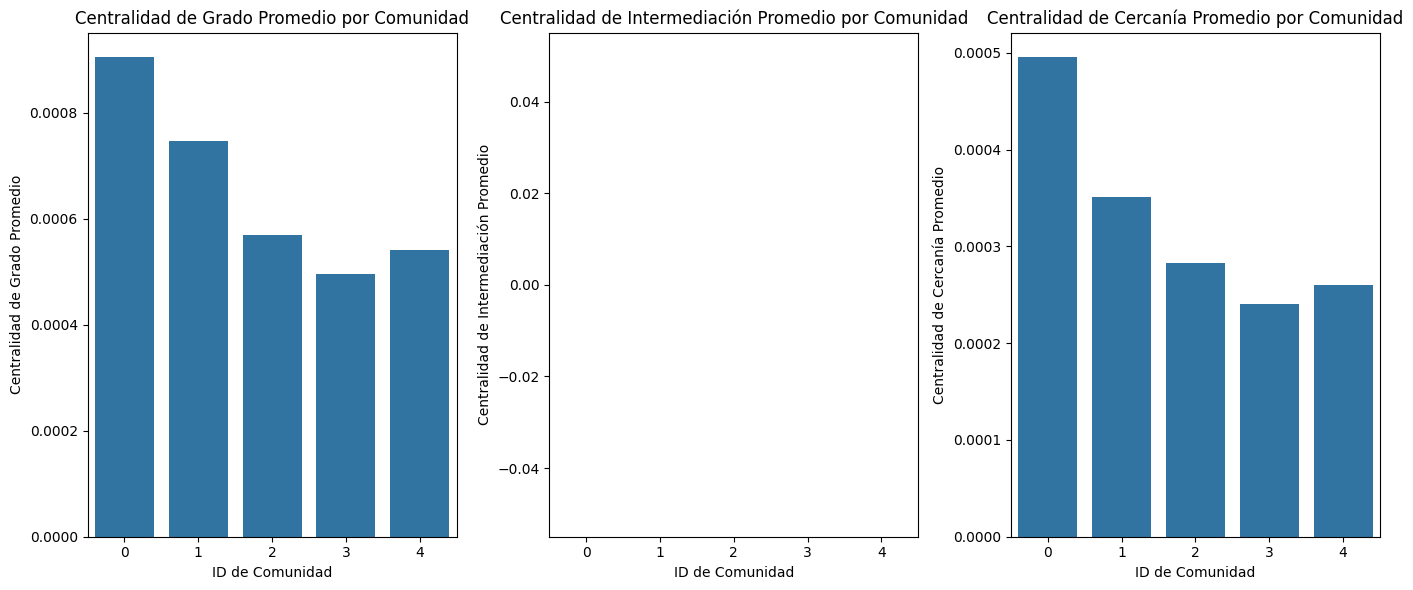

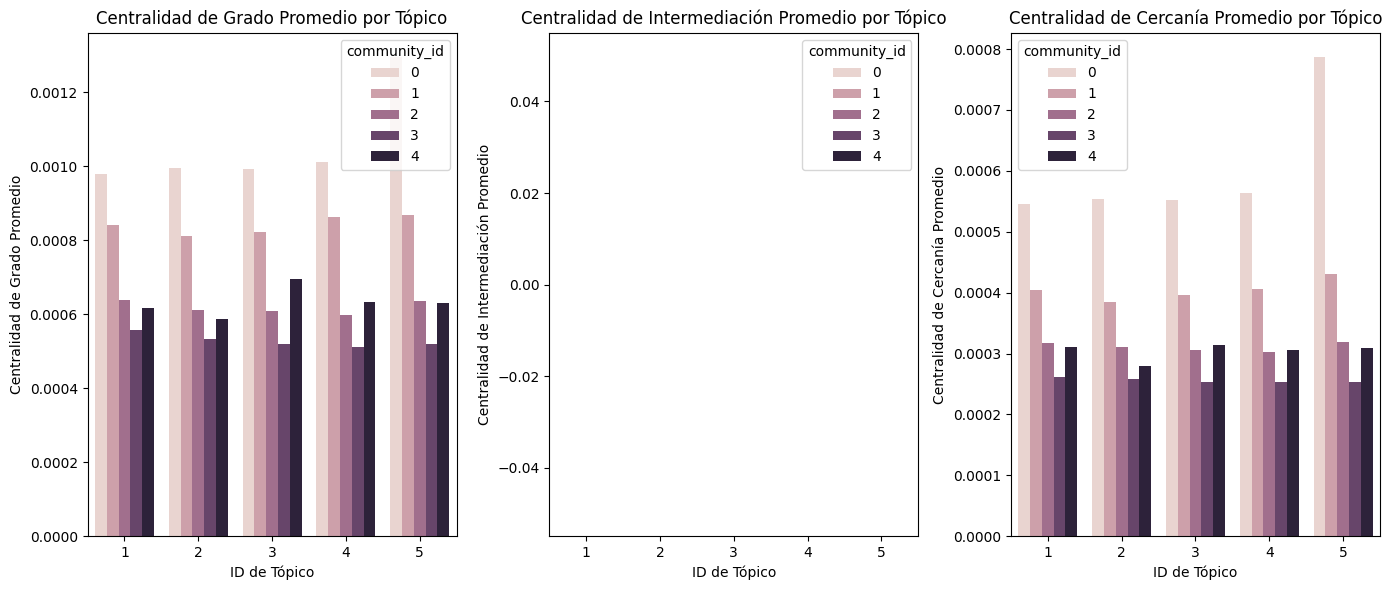

In [1]:
import pandas as pd
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Función para limpiar texto
def clean_text(text):
    stopwords = set([
        'de', 'la', 'que', 'a', 'y', 'el', 'en', 'los', 'no', 'se', 'por', 
        'es', 'con', 'del', 'las', 'lo', 'un', 'una', 'al', 'para', 'más', 
        'como', 'pero', 'le', 'ya', 'eso', 'tiene', 'todo', 'son', 'han', 
        'si', 'hay', 'bien', 'sus', 'cuando', 'esta', 'hay', 'ser', 'quien', 
        'uno', 'ni', 'sobre', 'también', 'antes', 'desde', 'entre', 'hasta', 
        'después', 'sin', 'dos', 'mi', 'otro', 'me', 'ese', 'porque', 'solo', 
        'cada', 'sí', 'nos', 'este', 'ese', 'fue', 'puede', 'estos', 'otra', 
        'ya', 'yo', 'él', 'ella', 'nosotros', 'vosotros', 'ellos', 'ellas', 
        'mismo', 'misma', 'mismos', 'mismas', 'tú', 'ti', 'te', 'usted', 
        'ustedes', 'él', 'ella', 'ello', 'nos', 'os', 'les', 'les', 'lo', 
        'las', 'los', 'esos', 'esas', 'estos', 'estas', 'ser', 'hace', 'uno',
        'https', 'pi', '³n', 'ħs', 'ħera'
    ])
    words = text.lower().split()
    return ' '.join([word for word in words if word not in stopwords])

# Cargar los archivos CSV con el delimitador y la codificación correctos
df_20191004 = pd.read_csv('./data/tweets_20191004.csv', encoding='iso-8859-3', encoding_errors='replace', sep=';')
df_20191019 = pd.read_csv('./data/tweets_20191019.csv', encoding='iso-8859-3', encoding_errors='replace', sep=';')
df_20191103 = pd.read_csv('./data/tweets_20191103.csv', encoding='iso-8859-3', encoding_errors='replace', sep=';')

# Unir los DataFrames
df_combined = pd.concat([df_20191004, df_20191019, df_20191103])

# Limpiar el texto de los tweets
df_combined['clean_text'] = df_combined['text'].apply(clean_text)

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos y aristas al grafo basados en menciones
for index, row in df_combined.iterrows():
    user_id = row['user_id']
    tweet_text = row['text']
    mentions = [word[1:] for word in tweet_text.split() if word.startswith('@')]
    
    for mention in mentions:
        if G.has_node(user_id):
            G.nodes[user_id]['text'] += ' ' + tweet_text
        else:
            G.add_node(user_id, text=tweet_text)
        
        if G.has_node(mention):
            G.nodes[mention]['text'] += ' ' + tweet_text
        else:
            G.add_node(mention, text=tweet_text)
        
        G.add_edge(user_id, mention)

# Encontrar comunidades usando el algoritmo de modularidad
communities = greedy_modularity_communities(G)

# Asignar la comunidad a cada nodo
community_dict = {}
for i, community in enumerate(communities):
    for node in community:
        community_dict[node] = i

# Agregar la comunidad como atributo del nodo
nx.set_node_attributes(G, community_dict, 'community')

# Calcular métricas del grafo
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Agregar métricas como atributos del nodo
nx.set_node_attributes(G, degree_centrality, 'degree_centrality')
nx.set_node_attributes(G, betweenness_centrality, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_centrality, 'closeness_centrality')

# Guardar el grafo con las comunidades y medidas de centralidad
graphml_path = "./data/tweets_graph_with_centrality_and_communities.graphml"
nx.write_graphml(G, graphml_path)

# Análisis de las comunidades
community_sizes = {i: len(list(c)) for i, c in enumerate(communities)}
largest_communities = sorted(community_sizes.items(), key=lambda x: x[1], reverse=True)

# Identificar los nodos con mayor centralidad
top_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

# Mostrar las 5 comunidades más grandes
print("5 comunidades más grandes:", largest_communities[:5])

# Análisis de tópicos y tweets representativos por comunidad
topic_results = []
for i, (community_id, size) in enumerate(largest_communities[:5]):
    community_nodes = [node for node in G.nodes if G.nodes[node]['community'] == community_id]
    community_tweets = df_combined[df_combined['user_id'].isin(community_nodes)]
    
    # Vectorizar los tweets de la comunidad
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    dtm = vectorizer.fit_transform(community_tweets['clean_text'])
    
    # Ajustar el modelo LDA
    lda = LatentDirichletAllocation(n_components=5, random_state=0)
    lda.fit(dtm)
    
    # Mostrar los tópicos más importantes
    for index, topic in enumerate(lda.components_):
        top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
        topic_results.append((community_id, index + 1, top_words))
        print(f"Tópico {index + 1} en Comunidad {community_id}:")
        print(top_words)
    
    # Extraer tweets representativos
    representative_tweets = community_tweets.head(5)['text'].tolist()
    print(f"Tweets representativos de la Comunidad {community_id}:")
    for tweet in representative_tweets:
        print(f"- {tweet}")

# Visualizar la distribución de los tamaños de las comunidades
community_ids, community_sizes = zip(*largest_communities)
plt.bar(community_ids, community_sizes)
plt.xlabel('ID de Comunidad')
plt.ylabel('Tamaño de la Comunidad')
plt.title('Distribución de Tamaños de las Comunidades')
plt.show()

# Visualizar las métricas del grafo
degree_values = [v for k, v in degree_centrality.items()]
betweenness_values = [v for k, v in betweenness_centrality.items()]
closeness_values = [v for k, v in closeness_centrality.items()]

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(degree_values, bins=50)
plt.title('Distribución de Centralidad de Grado')
plt.xlabel('Centralidad de Grado')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
plt.hist(betweenness_values, bins=50)
plt.title('Distribución de Centralidad de Intermediación')
plt.xlabel('Centralidad de Intermediación')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 3)
plt.hist(closeness_values, bins=50)
plt.title('Distribución de Centralidad de Cercanía')
plt.xlabel('Centralidad de Cercanía')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Mostrar los nodos con mayor centralidad
print("Top 5 nodos por centralidad de grado:", top_degree_centrality)
print("Top 5 nodos por centralidad de intermediación:", top_betweenness_centrality)
print("Top 5 nodos por centralidad de cercanía:", top_closeness_centrality)

# Analizar métricas por comunidad
community_metrics = []
for community_id, size in largest_communities[:5]:
    community_nodes = [node for node in G.nodes if G.nodes[node]['community'] == community_id]
    degree_values = [degree_centrality[node] for node in community_nodes]
    betweenness_values = [betweenness_centrality[node] for node in community_nodes]
    closeness_values = [closeness_centrality[node] for node in community_nodes]
    
    avg_degree = sum(degree_values) / len(degree_values) if degree_values else 0
    avg_betweenness = sum(betweenness_values) / len(betweenness_values) if betweenness_values else 0
    avg_closeness = sum(closeness_values) / len(closeness_values) if closeness_values else 0
    
    community_metrics.append({
        'community_id': community_id,
        'size': size,
        'avg_degree_centrality': avg_degree,
        'avg_betweenness_centrality': avg_betweenness,
        'avg_closeness_centrality': avg_closeness
    })

# Mostrar las métricas por comunidad
for metrics in community_metrics:
    print(f"Comunidad {metrics['community_id']} - Tamaño: {metrics['size']}")
    print(f"   Centralidad de Grado Promedio: {metrics['avg_degree_centrality']:.4f}")
    print(f"   Centralidad de Intermediación Promedio: {metrics['avg_betweenness_centrality']:.4f}")
    print(f"   Centralidad de Cercanía Promedio: {metrics['avg_closeness_centrality']:.4f}")

# Análisis por tópicos
topic_metrics = []
for (community_id, topic_id, top_words) in topic_results:
    topic_nodes = [node for node in G.nodes if G.nodes[node]['community'] == community_id and any(word in G.nodes[node]['text'] for word in top_words)]
    
    if not topic_nodes:
        continue
    
    degree_values = [degree_centrality[node] for node in topic_nodes]
    betweenness_values = [betweenness_centrality[node] for node in topic_nodes]
    closeness_values = [closeness_centrality[node] for node in topic_nodes]
    
    avg_degree = sum(degree_values) / len(degree_values) if degree_values else 0
    avg_betweenness = sum(betweenness_values) / len(betweenness_values) if betweenness_values else 0
    avg_closeness = sum(closeness_values) / len(closeness_values) if closeness_values else 0
    
    topic_metrics.append({
        'community_id': community_id,
        'topic_id': topic_id,
        'top_words': top_words,
        'avg_degree_centrality': avg_degree,
        'avg_betweenness_centrality': avg_betweenness,
        'avg_closeness_centrality': avg_closeness
    })

# Mostrar las métricas por tópico
for metrics in topic_metrics:
    print(f"Comunidad {metrics['community_id']} - Tópico {metrics['topic_id']} - Palabras Clave: {metrics['top_words']}")
    print(f"   Centralidad de Grado Promedio: {metrics['avg_degree_centrality']:.4f}")
    print(f"   Centralidad de Intermediación Promedio: {metrics['avg_betweenness_centrality']:.4f}")
    print(f"   Centralidad de Cercanía Promedio: {metrics['avg_closeness_centrality']:.4f}")

# Visualizar las métricas por comunidad y tópico
import seaborn as sns
import pandas as pd

# Convertir las métricas a DataFrames
community_metrics_df = pd.DataFrame(community_metrics)
topic_metrics_df = pd.DataFrame(topic_metrics)

# Graficar métricas por comunidad
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.barplot(data=community_metrics_df, x='community_id', y='avg_degree_centrality')
plt.title('Centralidad de Grado Promedio por Comunidad')
plt.xlabel('ID de Comunidad')
plt.ylabel('Centralidad de Grado Promedio')

plt.subplot(1, 3, 2)
sns.barplot(data=community_metrics_df, x='community_id', y='avg_betweenness_centrality')
plt.title('Centralidad de Intermediación Promedio por Comunidad')
plt.xlabel('ID de Comunidad')
plt.ylabel('Centralidad de Intermediación Promedio')

plt.subplot(1, 3, 3)
sns.barplot(data=community_metrics_df, x='community_id', y='avg_closeness_centrality')
plt.title('Centralidad de Cercanía Promedio por Comunidad')
plt.xlabel('ID de Comunidad')
plt.ylabel('Centralidad de Cercanía Promedio')

plt.tight_layout()
plt.show()

# Graficar métricas por tópico
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.barplot(data=topic_metrics_df, x='topic_id', y='avg_degree_centrality', hue='community_id')
plt.title('Centralidad de Grado Promedio por Tópico')
plt.xlabel('ID de Tópico')
plt.ylabel('Centralidad de Grado Promedio')

plt.subplot(1, 3, 2)
sns.barplot(data=topic_metrics_df, x='topic_id', y='avg_betweenness_centrality', hue='community_id')
plt.title('Centralidad de Intermediación Promedio por Tópico')
plt.xlabel('ID de Tópico')
plt.ylabel('Centralidad de Intermediación Promedio')

plt.subplot(1, 3, 3)
sns.barplot(data=topic_metrics_df, x='topic_id', y='avg_closeness_centrality', hue='community_id')
plt.title('Centralidad de Cercanía Promedio por Tópico')
plt.xlabel('ID de Tópico')
plt.ylabel('Centralidad de Cercanía Promedio')

plt.tight_layout()
plt.show()
